In [1]:
%reload_ext autoreload
from typing import Optional, List, Union
import re
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("..")

from magni_dash.config.constants import TRAJECTORY_SAMPLES_PATH
from magni_dash.st_components.cache import load_df, process_data

In [2]:
FN = "Qualisys_270922_SC6A_H1_P1_pp.tsv"

In [3]:
raw_df = load_df(
        df_path=os.path.join(TRAJECTORY_SAMPLES_PATH, FN),
        sep="\t",
        header=11,
        index_col="Frame",
    )
processed_df = process_data(raw_df=raw_df)

2023-04-19 15:22:08.782 
  command:

    streamlit run /home/tmr/miniconda3/envs/magni-dash/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [4]:
processed_df

,Time,DARKO_Robot - 1 X,DARKO_Robot - 1 Y,DARKO_Robot - 2 X,DARKO_Robot - 2 Y,DARKO_Robot - 3 X,DARKO_Robot - 3 Y,DARKO_Robot - 4 X,DARKO_Robot - 4 Y,DARKO_Robot - 5 X,...,DARKO_Robot - 6 X,DARKO_Robot - 6 Y,DARKO_Robot - 7 X,DARKO_Robot - 7 Y,Helmet_1 - 1 X,Helmet_1 - 1 Y,Helmet_1 - 2 X,Helmet_1 - 2 Y,Helmet_1 - 3 X,Helmet_1 - 3 Y
Frame,,,,,,,,,,,,,,,,,,,,,
1,0.00,1396.537,-214.347,853.281,421.981,1695.296,-151.634,792.148,455.794,1578.882,...,1545.846,467.068,892.264,-131.398,6338.134,586.469,6102.620,535.364,6401.660,379.448
2,0.01,1396.539,-214.431,853.263,421.924,1695.309,-151.614,792.150,455.788,1578.931,...,1545.885,467.390,892.231,-131.363,6338.754,586.201,6103.292,533.905,6403.273,379.573
3,0.02,1396.569,-214.387,853.279,421.936,1695.281,-151.636,792.141,455.777,1578.938,...,1545.883,467.410,892.197,-131.322,6339.407,585.921,6104.045,532.485,6404.934,379.663
4,0.03,1396.522,-214.303,853.302,421.966,1695.295,-151.642,792.158,455.793,1578.994,...,1545.871,467.385,892.261,-131.356,6340.158,585.700,6104.754,531.045,6406.563,379.794
5,0.04,1396.523,-214.298,853.270,421.926,1695.292,-151.613,792.154,455.791,1578.918,...,1545.885,467.381,892.193,-131.345,6340.856,585.441,6105.649,529.621,6408.240,379.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,238.52,1396.537,-214.652,853.341,421.903,1695.438,-151.656,792.166,455.601,1579.007,...,1545.846,467.465,892.033,-131.585,4844.397,126.037,4993.440,-32.378,4658.483,-20.204
23854,238.53,1396.535,-214.659,853.343,421.967,1695.428,-151.646,792.171,455.640,1578.940,...,1545.859,467.443,892.065,-131.566,4838.280,119.167,4987.573,-38.966,4652.360,-27.452
23855,238.54,1396.587,-214.661,853.324,421.921,1695.436,-151.676,792.197,455.629,1578.906,...,1545.879,467.469,892.030,-131.576,4832.322,112.183,4981.692,-45.657,4646.233,-34.690


In [5]:
processed_df[processed_df.columns[
    (processed_df.columns.str.startswith("DARKO_Robot"))
    | (processed_df.columns.str.startswith("Helmet"))
]]/=1000

In [6]:
processed_df[processed_df.columns[
    (processed_df.columns.str.startswith("DARKO_Robot"))
    | (processed_df.columns.str.startswith("Helmet"))
]]

,DARKO_Robot - 1 X,DARKO_Robot - 1 Y,DARKO_Robot - 2 X,DARKO_Robot - 2 Y,DARKO_Robot - 3 X,DARKO_Robot - 3 Y,DARKO_Robot - 4 X,DARKO_Robot - 4 Y,DARKO_Robot - 5 X,DARKO_Robot - 5 Y,DARKO_Robot - 6 X,DARKO_Robot - 6 Y,DARKO_Robot - 7 X,DARKO_Robot - 7 Y,Helmet_1 - 1 X,Helmet_1 - 1 Y,Helmet_1 - 2 X,Helmet_1 - 2 Y,Helmet_1 - 3 X,Helmet_1 - 3 Y
Frame,,,,,,,,,,,,,,,,,,,,
1,1.396537,-0.214347,0.853281,0.421981,1.695296,-0.151634,0.792148,0.455794,1.578882,-0.013647,1.545846,0.467068,0.892264,-0.131398,6.338134,0.586469,6.102620,0.535364,6.401660,0.379448
2,1.396539,-0.214431,0.853263,0.421924,1.695309,-0.151614,0.792150,0.455788,1.578931,-0.013671,1.545885,0.467390,0.892231,-0.131363,6.338754,0.586201,6.103292,0.533905,6.403273,0.379573
3,1.396569,-0.214387,0.853279,0.421936,1.695281,-0.151636,0.792141,0.455777,1.578938,-0.013722,1.545883,0.467410,0.892197,-0.131322,6.339407,0.585921,6.104045,0.532485,6.404934,0.379663
4,1.396522,-0.214303,0.853302,0.421966,1.695295,-0.151642,0.792158,0.455793,1.578994,-0.013689,1.545871,0.467385,0.892261,-0.131356,6.340158,0.585700,6.104754,0.531045,6.406563,0.379794
5,1.396523,-0.214298,0.853270,0.421926,1.695292,-0.151613,0.792154,0.455791,1.578918,-0.013666,1.545885,0.467381,0.892193,-0.131345,6.340856,0.585441,6.105649,0.529621,6.408240,0.379899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,1.396537,-0.214652,0.853341,0.421903,1.695438,-0.151656,0.792166,0.455601,1.579007,-0.013793,1.545846,0.467465,0.892033,-0.131585,4.844397,0.126037,4.993440,-0.032378,4.658483,-0.020204
23854,1.396535,-0.214659,0.853343,0.421967,1.695428,-0.151646,0.792171,0.455640,1.578940,-0.013804,1.545859,0.467443,0.892065,-0.131566,4.838280,0.119167,4.987573,-0.038966,4.652360,-0.027452
23855,1.396587,-0.214661,0.853324,0.421921,1.695436,-0.151676,0.792197,0.455629,1.578906,-0.013779,1.545879,0.467469,0.892030,-0.131576,4.832322,0.112183,4.981692,-0.045657,4.646233,-0.034690


In [7]:
int(processed_df[processed_df.columns[
    (processed_df.columns.str.startswith("Helmet"))
]].shape[1] / 2)

3

In [39]:
class SpatioTemporalFeatures:
    @staticmethod
    def get_delta_columns(input_df: pd.DataFrame):
        initial_columns = set(input_df.columns)
        out_df = input_df.diff().add_suffix("_delta").fillna(0).sort_index(axis=1)

        delta_cols = set(out_df.columns) - initial_columns
        print(f"{delta_cols} created!")
        return out_df

    @staticmethod
    def get_displacement(input_df: pd.DataFrame):
        out_df = input_df.copy()
        out_df[f"{input_df.name}_displacement"] = np.sqrt(
            np.square(out_df).sum(axis=1)
        )  # in mm
        return out_df

    @staticmethod
    def get_speed(
        input_df: pd.DataFrame,
        time_col_name: str,
        element_name: Union[str, List[str]],
        out_col_name: str = "speed",
    ) -> pd.DataFrame:
        element_name = [element_name] if isinstance(element_name, str) else element_name
        out_df = input_df.copy()

        if time_col_name not in input_df.columns:
            raise ValueError(f"{time_col_name} not in df's columns")

        delta_df = SpatioTemporalFeatures.get_delta_columns(out_df)
        speed_dfs = []
        for element in element_name:
            element_pat = (
                r"DARKO_Robot - (\d) " if element == "Darko_Robot" else r"Helmet_(\d+ - \d).*"
            )
            elements_disp = delta_df.groupby(
                delta_df.columns.str.extract(element_pat, expand=False),
                axis=1,
            ).apply(SpatioTemporalFeatures.get_displacement)

            elements_disp.columns = elements_disp.columns.droplevel(0)
            elements_disp = elements_disp.join(
                delta_df.loc[:, [f"{time_col_name}_delta"]]
            )

            elements_disp = elements_disp.rename_axis(None, axis=1)

            disp_cols = elements_disp.columns[
                elements_disp.columns.str.endswith("displacement")
            ]
            n_markers = len(disp_cols)
            speed_cols = [f"{out_col_name}_{element}-{i}" for i in range(1, n_markers + 1)]
            elements_disp.loc[:, speed_cols] = (
                elements_disp[disp_cols]
                .div(elements_disp["Time_delta"].values, axis=0)
                .values
            )
            print(f"{speed_cols} created successfully!")
            speed_dfs.append(elements_disp)
        speed_df = pd.concat(speed_dfs, axis=1, ignore_index=False)


        return speed_df

In [40]:
speed_df = SpatioTemporalFeatures.get_speed(
    processed_df, time_col_name="Time", element_name=["Helmet_1", "Darko_Robot"]
)

{'DARKO_Robot - 6 X_delta', 'Helmet_1 - 1 X_delta', 'Helmet_1 - 2 X_delta', 'DARKO_Robot - 5 Y_delta', 'DARKO_Robot - 7 Y_delta', 'DARKO_Robot - 4 X_delta', 'DARKO_Robot - 1 Y_delta', 'DARKO_Robot - 1 X_delta', 'Helmet_1 - 1 Y_delta', 'Helmet_1 - 3 X_delta', 'DARKO_Robot - 2 Y_delta', 'DARKO_Robot - 2 X_delta', 'DARKO_Robot - 7 X_delta', 'DARKO_Robot - 4 Y_delta', 'Time_delta', 'Helmet_1 - 3 Y_delta', 'DARKO_Robot - 5 X_delta', 'Helmet_1 - 2 Y_delta', 'DARKO_Robot - 6 Y_delta', 'DARKO_Robot - 3 X_delta', 'DARKO_Robot - 3 Y_delta'} created!
['speed_Helmet_1-1', 'speed_Helmet_1-2', 'speed_Helmet_1-3'] created successfully!
['speed_Darko_Robot-1', 'speed_Darko_Robot-2', 'speed_Darko_Robot-3', 'speed_Darko_Robot-4', 'speed_Darko_Robot-5', 'speed_Darko_Robot-6', 'speed_Darko_Robot-7'] created successfully!


In [41]:
speed_df.columns

Index(['Helmet_1 - 1 X_delta', 'Helmet_1 - 1 Y_delta', '1 - 1_displacement',
       'Helmet_1 - 2 X_delta', 'Helmet_1 - 2 Y_delta', '1 - 2_displacement',
       'Helmet_1 - 3 X_delta', 'Helmet_1 - 3 Y_delta', '1 - 3_displacement',
       'Time_delta', 'speed_Helmet_1-1', 'speed_Helmet_1-2',
       'speed_Helmet_1-3', 'DARKO_Robot - 1 X_delta',
       'DARKO_Robot - 1 Y_delta', '1_displacement', 'DARKO_Robot - 2 X_delta',
       'DARKO_Robot - 2 Y_delta', '2_displacement', 'DARKO_Robot - 3 X_delta',
       'DARKO_Robot - 3 Y_delta', '3_displacement', 'DARKO_Robot - 4 X_delta',
       'DARKO_Robot - 4 Y_delta', '4_displacement', 'DARKO_Robot - 5 X_delta',
       'DARKO_Robot - 5 Y_delta', '5_displacement', 'DARKO_Robot - 6 X_delta',
       'DARKO_Robot - 6 Y_delta', '6_displacement', 'DARKO_Robot - 7 X_delta',
       'DARKO_Robot - 7 Y_delta', '7_displacement', 'Time_delta',
       'speed_Darko_Robot-1', 'speed_Darko_Robot-2', 'speed_Darko_Robot-3',
       'speed_Darko_Robot-4', 'speed_D

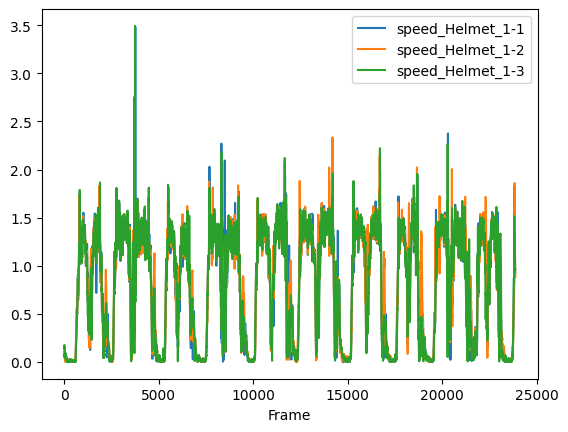

In [42]:
speed_df.reset_index().plot(x="Frame", y=["speed_Helmet_1-1", "speed_Helmet_1-2", "speed_Helmet_1-3"]);

<AxesSubplot: xlabel='Frame'>

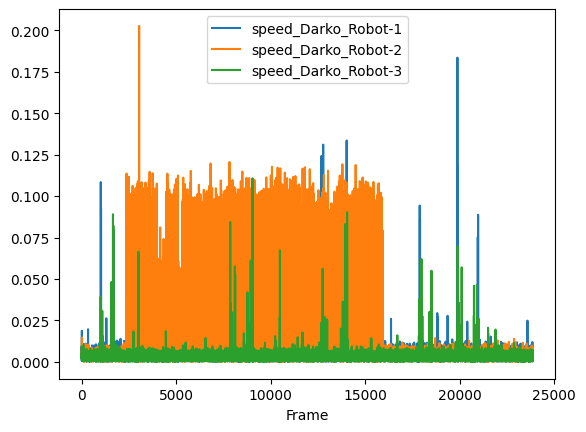

In [43]:
speed_df.reset_index().plot(
    x="Frame", y=["speed_Darko_Robot-1", "speed_Darko_Robot-2", "speed_Darko_Robot-3"]
)